# AbdolazizsalimiFinal980292626

## About DataSet:

### Abstract: 


Contrast-enhanced spectral mammography (CESM) is a relatively recent imaging modality with increased diagnostic accuracy compared to digital mammography (DM). New deep learning (DL) models were developed that have accuracies equal to that of an average radiologist. However, most studies trained the DL models on DM images as no datasets exist for CESM images. We aim to resolve this limitation by releasing a Categorized Digital Database for Low energy and Subtracted Contrast Enhanced Spectral Mammography images (CDD-CESM) to evaluate decision support systems. The dataset includes 2006 images, with an average resolution of 2355 × 1315, consisting of 310 mass images, 48 architectural distortion images, 222 asymmetry images, 238 calcifications images, 334 mass enhancement images, 184 non-mass enhancement images, 159 postoperative images, 8 post neoadjuvant chemotherapy images, and 751 normal images, with 248 images having more than one finding. This is the first dataset to incorporate data selection, segmentation annotation, medical reports, and pathological diagnosis for all cases. Moreover, we propose and evaluate a DL-based technique to automatically segment abnormal findings in images.

![a:Low-energy | b:High-energy | c:subtracted-Image](Lowenergy-Highenergy-Sub.png)


* (a) :Low-energy 
* (b) :High-energy
* (c) :subtracted-Image

## Pre-trained Model: VGG-19

VGG-19 is a deep convolutional neural network architecture that has been pre-trained on the ImageNet dataset. The architecture consists of 19 layers, including convolutional layers, max-pooling layers, and fully connected layers. It is widely used for image classification, feature extraction, and transfer learning tasks due to its high performance and generalization capabilities.

![VGG-19 Architecture](vgg19_layers.png)

In the visualization above, you can see the structure of the VGG-19 model. The model consists of several Conv2D layers (cyan) with ReLU activation functions (yellow), followed by MaxPooling2D layers (purple) to reduce spatial dimensions.

### import dependency

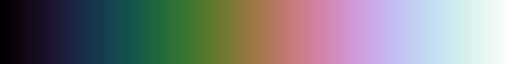

In [130]:
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns 
from tqdm.notebook import tqdm
from os import listdir
import numpy as np 

sns.color_palette("cubehelix", as_cmap=True)

In [131]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

### load Radiology manual file :

In [132]:
path = r'../Radiology-manual-annotations.xlsx'
manual = pd.read_excel(path)

In [133]:
df = manual.copy()

In [134]:
#drop DM type 
#dont have image sample
df = df[df['Type'] != 'DM']

In [135]:
df.head()

,Image_name,Patient_ID,Side,Type,Age,Breast density (ACR),BIRADS,Findings,View,Tags,Machine,Pathology Classification/ Follow up
1,P1_L_CM_MLO,1,L,CESM,46,_,4,Heterogenous non mass enhancement,MLO,"suspicious, non mass",1,Malignant
4,P2_R_CM_CC,2,R,CESM,31,_,3,Multiple homogenously enhancing masses,CC,"benign, masses, homogenous",2,Benign
5,P2_R_CM_MLO,2,R,CESM,31,_,3,Multiple homogenously enhancing masses,MLO,"benign, masses, homogenous",2,Benign
8,P2_L_CM_CC,2,L,CESM,31,_,2,Flap with no enhancement,CC,"flap, benign",2,Benign
9,P2_L_CM_MLO,2,L,CESM,31,_,2,Flap with no enhancement,MLO,"flap, benign",2,Benign


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1003 entries, 1 to 2005
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Image_name                           1003 non-null   object
 1   Patient_ID                           1003 non-null   int64 
 2   Side                                 1003 non-null   object
 3   Type                                 1003 non-null   object
 4   Age                                  1003 non-null   int64 
 5   Breast density (ACR)                 1003 non-null   object
 6   BIRADS                               1003 non-null   object
 7   Findings                             1003 non-null   object
 8   View                                 1003 non-null   object
 9   Tags                                 1003 non-null   object
 10  Machine                              1003 non-null   int64 
 11  Pathology Classification/ Follow up  1003 n

In [137]:
df.isnull().sum()

Image_name                             0
Patient_ID                             0
Side                                   0
Type                                   0
Age                                    0
Breast density (ACR)                   0
BIRADS                                 0
Findings                               0
View                                   0
Tags                                   0
Machine                                0
Pathology Classification/ Follow up    0
dtype: int64

In [138]:
# Rename the column
df.rename(columns={'Pathology Classification/ Follow up': 'PathologyClassification'}, inplace=True)

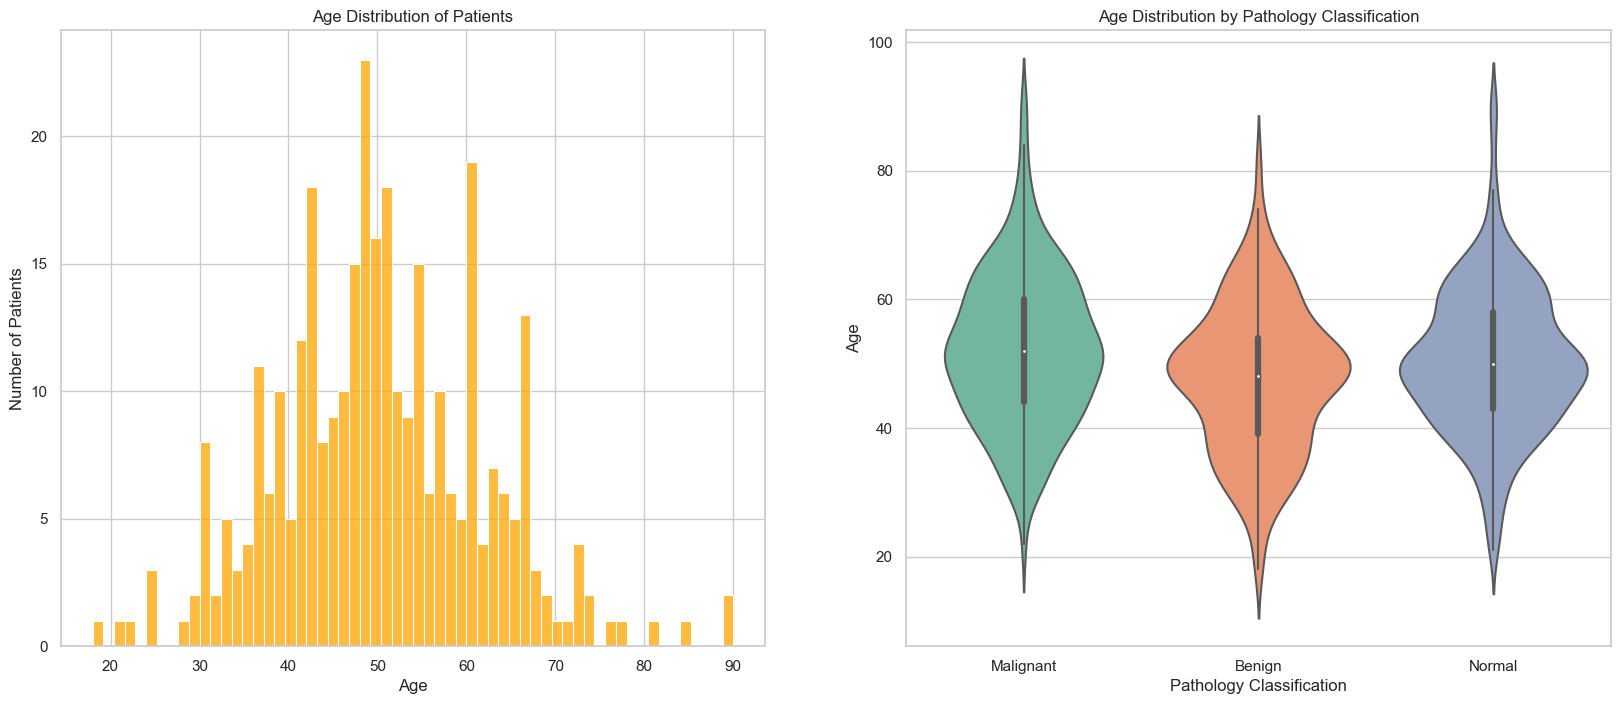

In [139]:

def plot_age_distribution(df):
    ages = df[df.Age.isnull() == False].groupby(
        'Patient_ID').Age.apply(lambda l: np.unique(l)[0])


    fig, ax = plt.subplots(1, 2, figsize=(20, 8))


    sns.histplot(ages, color='orange', bins=60, ax=ax[0])
    ax[0].set_title('Age Distribution of Patients')
    ax[0].set_xlabel('Age')
    ax[0].set_ylabel('Number of Patients')


    sns.violinplot(x=df.PathologyClassification, y=df.Age, ax=ax[1], palette='Set2')
    ax[1].set_title('Age Distribution by Pathology Classification')
    ax[1].set_xlabel('Pathology Classification')
    ax[1].set_ylabel('Age')

    plt.show()


plot_age_distribution(df)

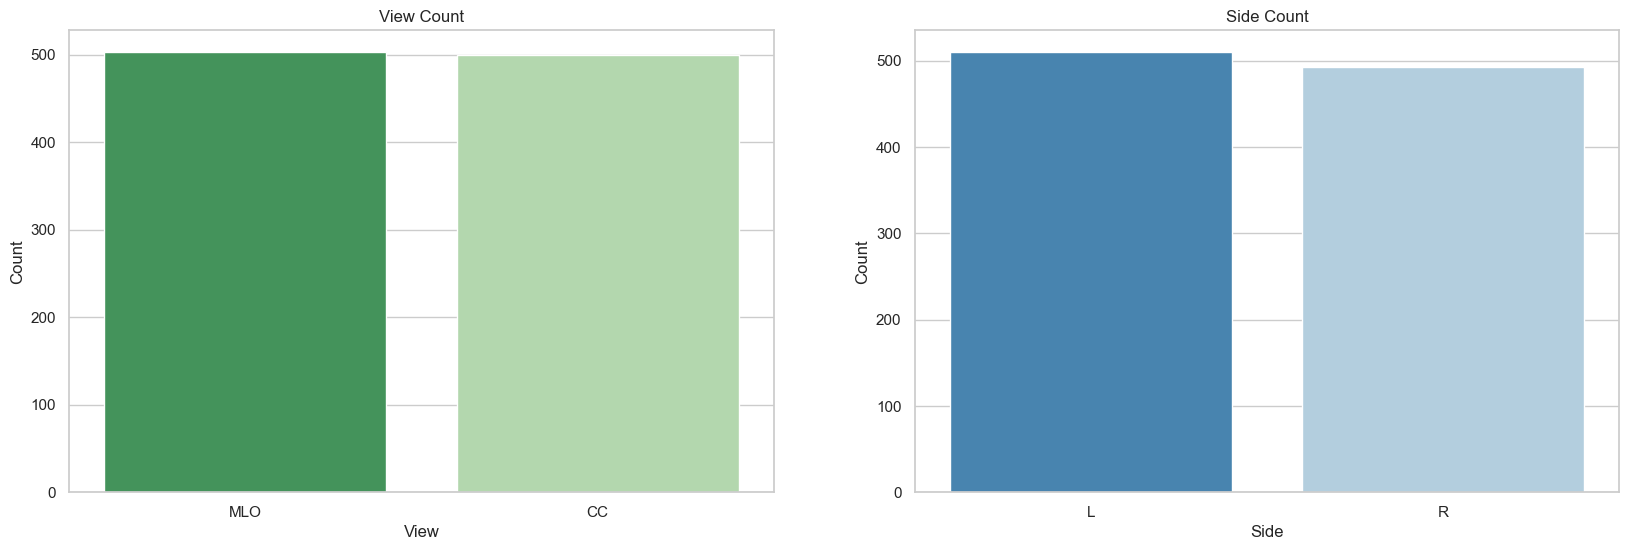

In [140]:

fig,ax = plt.subplots(1, 2, figsize=(20, 6))

# Plot View count plot
sns.countplot(x=df.View, ax=ax[0], palette='Greens_r')
ax[0].set_title('View Count')
ax[0].set_xlabel('View')
ax[0].set_ylabel('Count')

# Plot Side count plot
sns.countplot(x=df.Side, ax=ax[1], palette='Blues_r')
ax[1].set_title('Side Count')
ax[1].set_xlabel('Side')
ax[1].set_ylabel('Count')

# Display plots
plt.show()

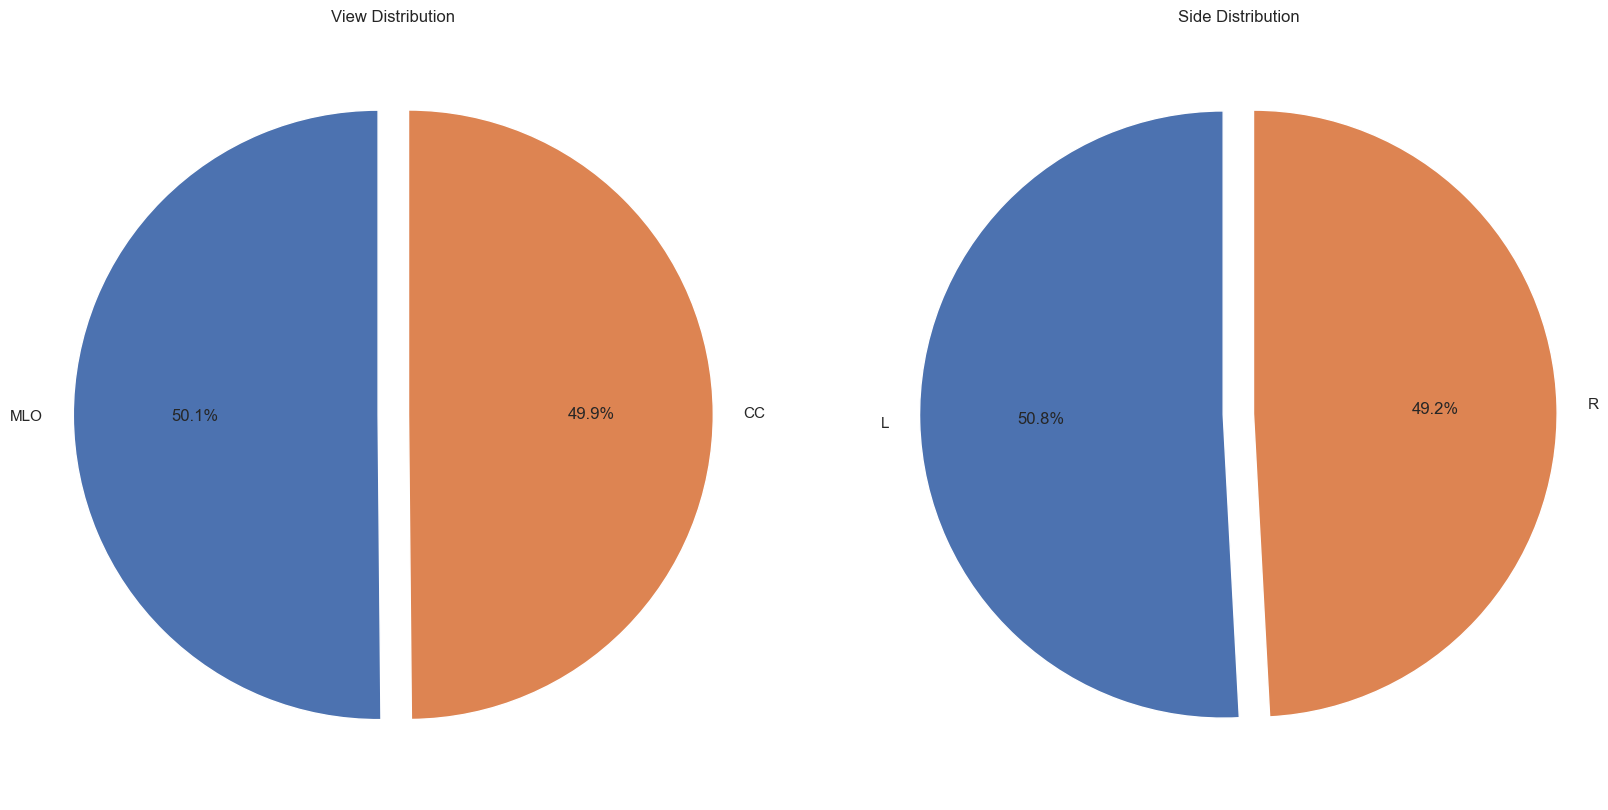

In [141]:


fig, ax = plt.subplots(1, 2, figsize=(20, 10))


view_counts = df.View.value_counts()
view_labels = view_counts.index
view_explode = [0.05] * len(view_counts)

# Plot View pie chart
ax[0].pie(view_counts, labels=view_labels, autopct='%.1f%%', explode=view_explode, startangle=90)
ax[0].set_title('View Distribution')
ax[0].axis('equal')

# Prepare data for Side pie chart
side_counts = df.Side.value_counts()
side_labels = side_counts.index
side_explode = [0.05] * len(side_counts)

# Plot Side pie chart
ax[1].pie(side_counts, labels=side_labels, autopct='%.1f%%', explode=side_explode, startangle=90)
ax[1].set_title('Side Distribution')
ax[1].axis('equal')

    # Display plots
plt.show()

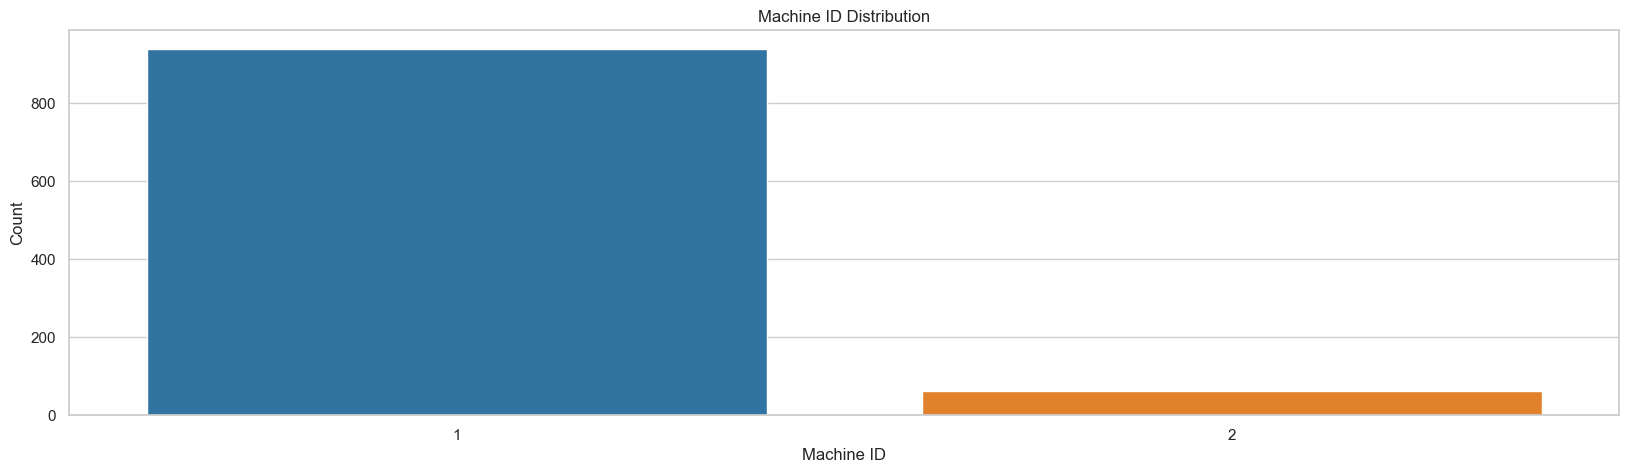

In [142]:

fig, ax = plt.subplots(figsize=(20, 5))

# Plot machine_id count plot
sns.countplot(x=df.Machine, palette='tab10', ax=ax)

# Set axis labels and title
ax.set_xlabel('Machine ID')
ax.set_ylabel('Count')
ax.set_title('Machine ID Distribution')

# Display plot
plt.show()


In [143]:
df.columns

Index(['Image_name', 'Patient_ID', 'Side', 'Type', 'Age',
       'Breast density (ACR)', 'BIRADS', 'Findings', 'View', 'Tags', 'Machine',
       'PathologyClassification'],
      dtype='object')

In [144]:
df['PathologyClassification'].value_counts()

Normal       416
Malignant    331
Benign       256
Name: PathologyClassification, dtype: int64

In [145]:
labels = df['PathologyClassification'].unique()
total_case = df['PathologyClassification'].count()
normal_case = df[df['PathologyClassification'] == 'Normal']
benign_case = df[df['PathologyClassification'] == 'Benign']
malignant_case = df[df['PathologyClassification'] == 'Malignant']

print(f"Labels: {labels}")
print(f"Total Cases: {total_case}")
print(f"Normal Cases: {len(normal_case)}")
print(f"Benign Cases: {len(benign_case)}")
print(f"Malignant Cases: {len(malignant_case)}")

Labels: ['Malignant' 'Benign' 'Normal']
Total Cases: 1003
Normal Cases: 416
Benign Cases: 256
Malignant Cases: 331


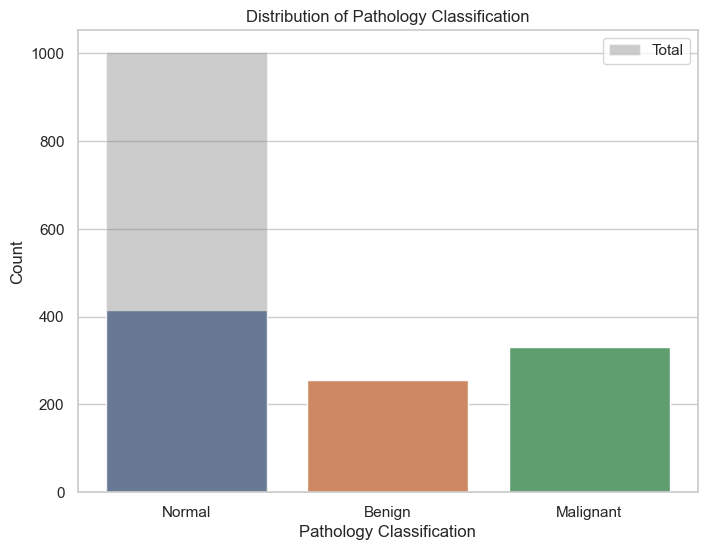

In [146]:
labels = ['Normal', 'Benign', 'Malignant']

counts = [len(normal_case), len(benign_case), len(malignant_case)]

plt.figure(figsize=(8, 6)) 
sns.barplot(x=labels, y=counts)
plt.bar(labels, [total_case, 0, 0], color='gray', alpha=0.4, label='Total')

plt.title('Distribution of Pathology Classification')
plt.xlabel('Pathology Classification')
plt.ylabel('Count')
plt.grid(True ,axis='y' )
plt.legend()
plt.show()

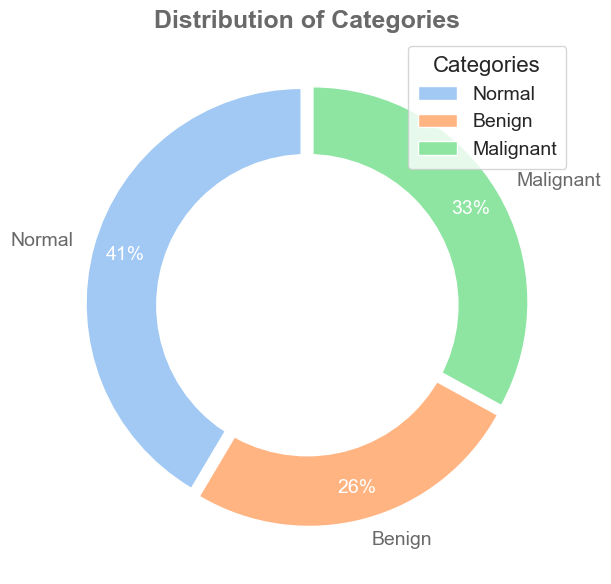

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(style="whitegrid")

colors = sns.color_palette('pastel')[0:3]


fig, ax = plt.subplots(figsize=(8, 6))


wedges, texts, autotexts = ax.pie(
    counts,
    labels=labels,
    autopct='%.0f%%',
    startangle=90,
    colors=colors,
    pctdistance=0.85,
    explode=(0.03, 0.03, 0.03)
)


centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)


for text in texts:
    text.set_fontsize(14)
    text.set_color('dimgray')

for autotext in autotexts:
    autotext.set_fontsize(14)
    autotext.set_color('white')


plt.title("Distribution of Categories", fontsize=18, fontweight='bold', color='dimgray')
ax.legend(loc='best', fontsize=14, title="Categories", title_fontsize=16, borderpad=0.5)

# Remove the frame around the chart
ax.set_frame_on(False)

# Show the plot
plt.tight_layout()
plt.show()

## pre-processing



In [148]:
path = r'../Subtracted images of CDD-CESM/'
Imagefile = listdir(path)
firstImage = Imagefile[0]
lastImage = Imagefile[-1]

In [149]:
print(f"First Image: {firstImage}")
print(f"Last Image: {lastImage}")
print(f'total of the Image: {len(Imagefile)}')

First Image: P100_L_CM_CC.jpg
Last Image: P9_L_CM_MLO.jpg
total of the Image: 1003


In [150]:
df_sorted_by_Image_name = df.sort_values(by='Image_name')
Image_labels = df_sorted_by_Image_name[['Image_name','PathologyClassification']]

In [151]:
Image_labels.head()

,Image_name,PathologyClassification
556,P100_L_CM_CC,Benign
557,P100_L_CM_MLO,Benign
552,P100_R_CM_CC,Normal
553,P100_R_CM_MLO,Normal
564,P101_L_CM_CC,Normal


In [152]:
Image_labels['CategoryCode'] = Image_labels['PathologyClassification'].astype('category').cat.codes

c:\Users\Parseh\anaconda3\envs\tf2.4\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [153]:
Image_labels.head()

,Image_name,PathologyClassification,CategoryCode
556,P100_L_CM_CC,Benign,0
557,P100_L_CM_MLO,Benign,0
552,P100_R_CM_CC,Normal,2
553,P100_R_CM_MLO,Normal,2
564,P101_L_CM_CC,Normal,2


In [154]:
Image_labels.to_csv('Image_labels.csv' , index=False)

### Image pre-processing 

In [155]:
import os 
from skimage import transform
import imageio

In [156]:
image_df = pd.read_csv('Image_labels.csv')

In [157]:
image_df.head()

,Image_name,PathologyClassification,CategoryCode
0,P100_L_CM_CC,Benign,0
1,P100_L_CM_MLO,Benign,0
2,P100_R_CM_CC,Normal,2
3,P100_R_CM_MLO,Normal,2
4,P101_L_CM_CC,Normal,2


In [158]:
image_directory = '../Subtracted images of CDD-CESM/'
files = os.listdir(image_directory)
file = files[3]
file_path = os.path.join(image_directory, file)
mri_image = imageio.imread(file_path)
output_size = (512, 512)  # Example: resizing to (512,512)
resized_image = transform.resize(mri_image, output_size)

In [159]:

print(f"mri_image shape: {mri_image.shape}")
print(f"resized_image shape: {resized_image.shape}")


mri_image shape: (2459, 1523, 3)
resized_image shape: (512, 512, 3)


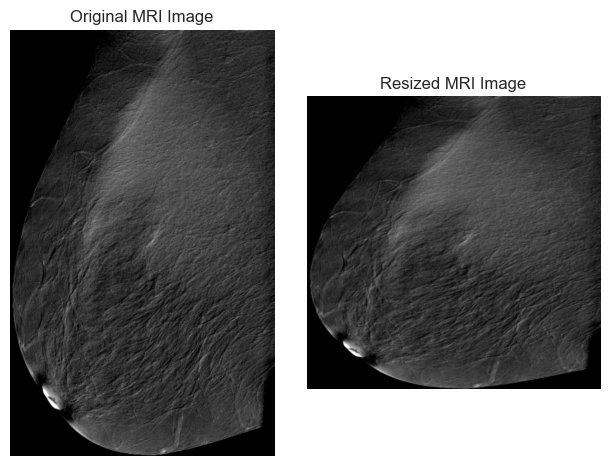

In [160]:

plt.subplot(1, 2, 1)
plt.imshow(mri_image)
plt.title('Original MRI Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(resized_image)
plt.title('Resized MRI Image')
plt.axis('off')

plt.tight_layout()
plt.show()

### Resize the image using transformer

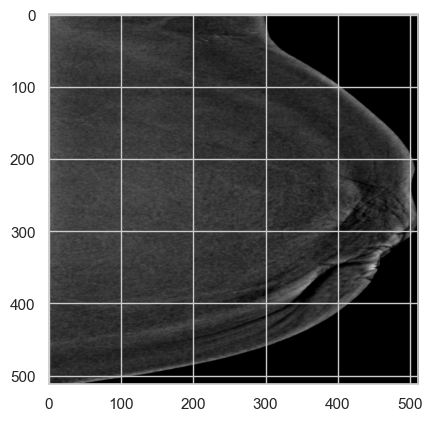

In [161]:
image_path = r'Images/'
plt.imshow(plt.imread(image_path+'/P2_L_CM_MLO.png'))


In [162]:
len(os.listdir(image_path))

1003

In [163]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D, MaxPool2D,Dropout,Flatten
from tensorflow.keras.callbacks import EarlyStopping

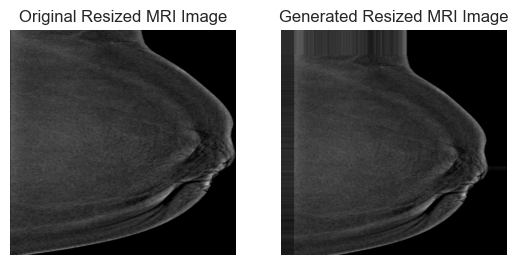

In [164]:
imggen = ImageDataGenerator(width_shift_range = 0.1, height_shift_range = 0.1,
                           shear_range = 0.1, zoom_range = 0.5, horizontal_flip =True,
                           fill_mode = 'nearest')

plt.subplot(1, 2, 1)
plt.title('Original Resized MRI Image')
plt.axis('off')
plt.imshow(plt.imread(image_path+'/P2_L_CM_MLO.png'))
plt.subplot(1, 2, 2)
plt.title('Generated Resized MRI Image')
plt.axis('off')
plt.imshow(imggen.random_transform(plt.imread(image_path+'/P2_L_CM_MLO.png')))

In [165]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [166]:
image1 = cv2.imread(image_path+'/P2_L_CM_MLO.png')
image2 = cv2.imread(image_path+'/P2_L_CM_MLO.png')

In [167]:
gray_image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray_image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

In [168]:
def plot_histogram(image, title):
    hist, bins = np.histogram(image.ravel(), 256, [0, 256])
    plt.plot(hist)
    plt.title(title)
    plt.xlabel("Intensity")
    plt.ylabel("Frequency")
    plt.xlim([0, 256])

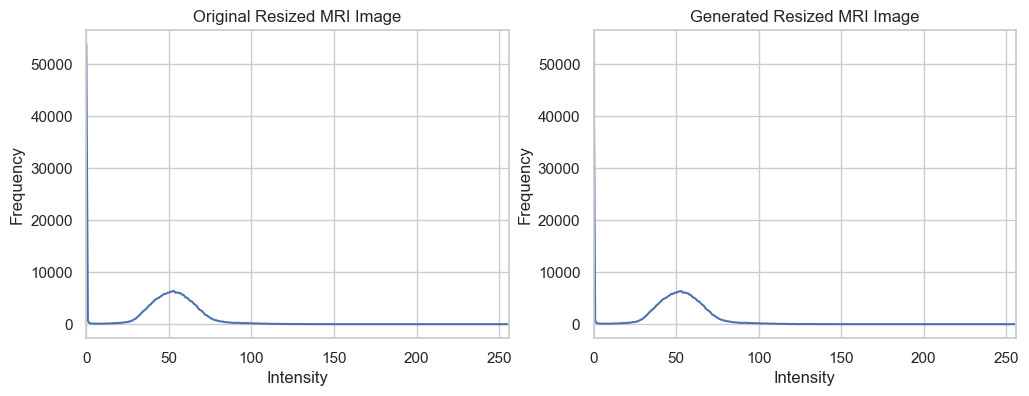

In [169]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plot_histogram(gray_image1, "Original Resized MRI Image")

plt.subplot(1, 2, 2)
plot_histogram(gray_image2, "Generated Resized MRI Image")

plt.show()

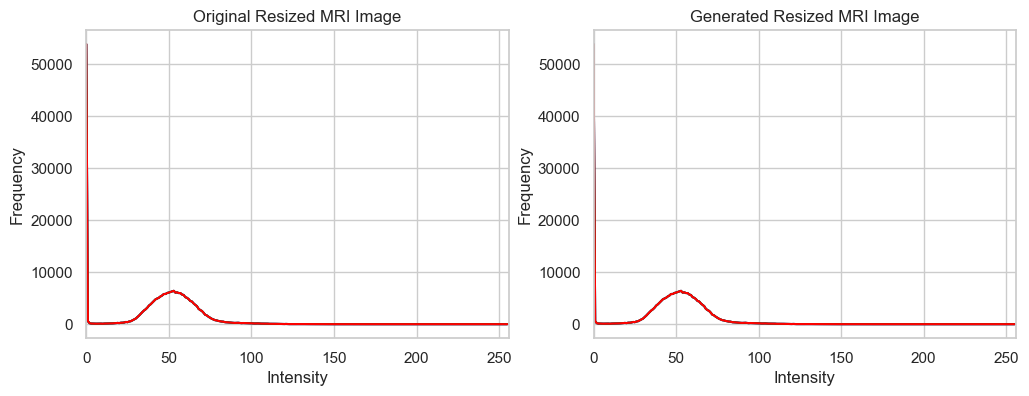

In [170]:
def plot_color_histogram(image, title):
    channels = ('b', 'g', 'r')
    colors = ('blue', 'green', 'red')

    for i, channel in enumerate(channels):
        hist, bins = np.histogram(image[:, :, i].ravel(), 256, [0, 256])
        plt.plot(hist, color=colors[i])
        plt.xlim([0, 256])

    plt.title(title)
    plt.xlabel("Intensity")
    plt.ylabel("Frequency")

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plot_color_histogram(image1, "Original Resized MRI Image")

plt.subplot(1, 2, 2)
plot_color_histogram(image2, "Generated Resized MRI Image")

plt.show()

### split Data

In [171]:
from sklearn.model_selection import train_test_split

In [172]:
normal_dir = r'./Normal/'
benign_dir = r'./Benign/'
malignant_dir = r'./Malignant/'

In [173]:
# Collect all image file paths and labels
filepaths = []
labels = []

In [174]:
for img_file in os.listdir(normal_dir):
    filepaths.append(os.path.join(normal_dir, img_file))
    labels.append(2)  

for img_file in os.listdir(benign_dir):
    filepaths.append(os.path.join(benign_dir, img_file))
    labels.append(0) 

for img_file in os.listdir(malignant_dir):
    filepaths.append(os.path.join(malignant_dir, img_file))
    labels.append(1)

In [175]:
from sklearn.model_selection import train_test_split

# Split the data into a train set (80%) and a temporary set (20%)
train_filepaths, temp_filepaths, train_labels, temp_labels = train_test_split(
    filepaths, labels, test_size=0.2, random_state=42, stratify=labels
)

# Split the temporary set into validation (10%) and test sets (10%)
val_filepaths, test_filepaths, val_labels, test_labels = train_test_split(
    temp_filepaths, temp_labels, test_size=0.5, random_state=42, stratify=temp_labels
)

In [176]:
train_filepaths[:5]

['./Malignant/P252_R_CM_CC.png',
 './Normal/P76_L_CM_MLO.png',
 './Benign/P114_R_CM_MLO.png',
 './Malignant/P174_L_CM_MLO.png',
 './Normal/P97_R_CM_CC.png']

In [177]:
train_labels[:5]

[1, 2, 0, 1, 2]

In [178]:
val_filepaths[:5]

['./Benign/P40_R_CM_MLO.png',
 './Normal/P312_R_CM_MLO.png',
 './Benign/P40_R_CM_CC.png',
 './Malignant/P277_L_CM_CC.png',
 './Malignant/P155_L_CM_MLO.png']

In [179]:
val_labels[:5]

[0, 2, 0, 1, 1]

In [180]:
test_filepaths[:5]

['./Normal/P251_L_CM_CC.png',
 './Benign/P191_R_CM_MLO.png',
 './Normal/P322_R_CM_CC.png',
 './Malignant/P209_L_CM_CC.png',
 './Normal/P204_L_CM_CC.png']

In [181]:
test_labels[:5]

[2, 0, 2, 1, 2]

In [182]:
import numpy as np
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.vgg16 import preprocess_input
import keras



In [183]:


# Create ImageDataGenerator instances with desired augmentation options
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [184]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical

def custom_generator(filepaths, labels, datagen, batch_size):
    while True:
        
        indices = np.random.permutation(len(filepaths))

        for start in range(0, len(indices), batch_size):
            end = min(start + batch_size, len(indices))
            batch_indices = indices[start:end]

            batch_filepaths = [filepaths[i] for i in batch_indices]
            batch_labels = [labels[i] for i in batch_indices]

            
            batch_images = []
            for filepath in batch_filepaths:
                img = load_img(filepath, target_size=(512, 512))
                img_array = img_to_array(img) / 255.0
                batch_images.append(img_array)

            batch_images = np.array(batch_images)
            batch_labels = to_categorical(batch_labels, num_classes=3)

            yield batch_images, batch_labels

In [185]:
batch_size = 64

train_generator = custom_generator(train_filepaths, train_labels, train_datagen, batch_size)
val_generator = custom_generator(val_filepaths, val_labels, val_datagen, batch_size)
test_generator = custom_generator(test_filepaths, test_labels, test_datagen, batch_size)

In [186]:
import h5py
print(h5py.__version__)

3.7.0


In [187]:
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(512, 512, 3))

In [188]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 512, 512, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 512, 512, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 512, 512, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 256, 256, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 256, 256, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 256, 256, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 128, 128, 128)     0     

### model 1 with Adam  : 

In [189]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization , LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.regularizers import L1, L2, L1L2
from tensorflow.keras.layers import GaussianNoise, Lambda
import tensorflow as tf

leaky_relu_alpha = .0001
l2_lambda = 0.001
num_classes = 3
model_Adam = Sequential([
    base_model,
    Conv2D(512, (3, 3), padding='same'),
    LeakyReLU(alpha=leaky_relu_alpha),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    GlobalAveragePooling2D(),
    Dense(128, activation='relu',  kernel_regularizer=L2(l2_lambda)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(64, activation='relu' , kernel_regularizer=L2(l2_lambda)),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])


In [190]:
model_Adam.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 16, 16, 512)       20024384  
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 512)       2359808   
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 16, 16, 512)       0         
                                                                 
 batch_normalization_8 (Batc  (None, 16, 16, 512)      2048      
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 512)        0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 8, 8, 256)        

In [191]:



for layer in base_model.layers[:]:
    layer.trainable = False

for layer in base_model.layers[:-3]:
    layer.trainable = False

    
from tensorflow.keras.callbacks import ModelCheckpoint

model_checkpoint = ModelCheckpoint(
    filepath='../Models/best_model_Adam.h5',
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)



optimizer = Adam(learning_rate=0.001)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

model_Adam.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

epochs = 10

history = model_Adam.fit(
    train_generator,
    steps_per_epoch=64,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=10,
    callbacks=[
        early_stopping,
        lr_scheduler,
        model_checkpoint,
    ]
)

Epoch 1/10
 1/64 [..............................] - ETA: 59:23 - loss: 2.7547 - accuracy: 0.3281

KeyboardInterrupt: 

### Model 2 with SGD: 

In [ ]:

leaky_relu_alpha = 0.1

num_classes = 3
model_SGD = Sequential([
    base_model,
    Conv2D(512, (3, 3), padding='same'),
    LeakyReLU(alpha=leaky_relu_alpha),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.6),
    Dense(num_classes, activation='softmax')
])


In [ ]:
model_SGD.summary()

In [ ]:

for layer in base_model.layers:
    layer.trainable = True

for layer in base_model.layers[:-3]:
    layer.trainable = False

from tensorflow.keras.callbacks import ModelCheckpoint

model_checkpoint = ModelCheckpoint(
    filepath='../Models/best_model_SGD.h5',
    monitor='val_accuracy',
    mode='min',
    save_best_only=True,
    verbose=1
)
from tensorflow.keras.optimizers import SGD

optimizer = SGD(learning_rate=0.01, momentum=0.9)

lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

model_SGD.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

epochs = 15

history = model_SGD.fit(
    train_generator,
    steps_per_epoch=70,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=10,
    callbacks=[
        early_stopping,
        lr_scheduler,
        model_checkpoint,
    ]
)

### model 3 flutten base : 

In [ ]:
for layer in base_model.layers:
    layer.trainable = True

for layer in base_model.layers[:-2]:
    layer.trainable = False

model_flutten = Sequential([
    base_model,
    Conv2D(512, (3, 3), padding='same'),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.6),
    Dense(train_gen.num_classes, activation='softmax')
])

In [ ]:
model_flutten.summary()

In [ ]:
model_checkpoint = ModelCheckpoint(
    filepath='../Models/best_model_Adam_flutten.h5',
    monitor='val_accuracy',
    mode='min',
    save_best_only=True,
    verbose=1
)



optimizer = Adam(learning_rate=0.001)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

model_flutten.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

epochs = 10

history = model_flutten.fit(
    train_generator,
    steps_per_epoch=70,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=10,
    callbacks=[
        early_stopping,
        lr_scheduler,
        model_checkpoint,
    ]
)

In [ ]:

# Step 4: Evaluate the best model on the test set
model.load_weights('../Models/best_model_Adam_flutten.h5')

y_true = test_gen.classes
y_pred = model.predict(test_gen, steps=test_gen.samples // batch_size, verbose=1)
y_pred_classes = y_pred.argmax(axis=1)

test_loss, test_acc = model.evaluate(test_gen, steps=test_gen.samples // batch_size, verbose=1)
print('Test accuracy:', test_acc)

auc = roc_auc_score(y_true, y_pred, multi_class='ovr')
print('Area Under the Receiver Operating Characteristic Curve (AUC-ROC):', auc)

cm = confusion_matrix(y_true, y_pred_classes)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(train_gen.num_classes)
plt.xticks(tick_marks, train_gen.class_indices, rotation=45)
plt.yticks(tick_marks, train_gen.class_indices)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

print(classification_report(y_true, y_pred_classes))

# Step 5: Visualize the training process
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.models import load_model


In [ ]:
# base_model.save('../Models/VGG-19.h5')

### adding Yolox to detect 

In [ ]:
!git clone https://github.com/Megvii-BaseDetection/YOLOX.git

Cloning into 'YOLOX'...
on a case-insensitive filesystem) and only one from the same
colliding group is in the working tree:

  'demo/ncnn/android/app/src/main/java/com/megvii/yoloXncnn/YOLOXncnn.java'
  'demo/ncnn/android/app/src/main/java/com/megvii/yoloXncnn/yoloXncnn.java'


In [ ]:
cd YOLOX

c:\D\datamining\Exer\finalProject\YOLOX


In [ ]:
!pip install -U pip && pip3 install -r requirements.txt


                                              0.0/172.4 MB ? eta -:--:--
                                              0.0/172.4 MB ? eta -:--:--
                                              0.0/172.4 MB ? eta -:--:--
                                              0.0/172.4 MB ? eta -:--:--
                                            0.0/172.4 MB 131.3 kB/s eta 0:21:53
                                            0.0/172.4 MB 151.3 kB/s eta 0:18:59
                                            0.1/172.4 MB 182.2 kB/s eta 0:15:46
                                            0.1/172.4 MB 196.3 kB/s eta 0:14:38
                                            0.1/172.4 MB 227.6 kB/s eta 0:12:38
                                            0.1/172.4 MB 277.4 kB/s eta 0:10:21
                                            0.2/172.4 MB 316.5 kB/s eta 0:09:05
                                            0.2/172.4 MB 389.1 kB/s eta 0:07:23
                                            0.3/172.4 MB 449.3 kB/s 

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.10.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.
tensorflow 2.10.0 requires tensorboard<2.11,>=2.10, but you have tensorboard 2.13.0 which is incompatible.
tensorflow-intel 2.12.0 requires keras<2.13,>=2.12.0, but you have keras 2.10.0 which is incompatible.
tensorflow-intel 2.12.0 requires tensorboard<2.13,>=2.12, but you have tensorboard 2.13.0 which is incompatible.
tensorflow-intel 2.12.0 requires tensorflow-estimator<2.13,>=2.12.0, but you have tensorflow-estimator 2.10.0 which is incompatible.


In [ ]:
!python setup.py develop

running develop
running egg_info
writing yolox.egg-info\PKG-INFO
writing dependency_links to yolox.egg-info\dependency_links.txt
writing requirements to yolox.egg-info\requires.txt
writing top-level names to yolox.egg-info\top_level.txt
reading manifest file 'yolox.egg-info\SOURCES.txt'
reading manifest template 'MANIFEST.in'
adding license file 'LICENSE'
writing manifest file 'yolox.egg-info\SOURCES.txt'
running build_ext
Creating c:\users\parseh\anaconda3\envs\tf2.4\lib\site-packages\yolox.egg-link (link to .)
yolox 0.3.0 is already the active version in easy-install.pth

Installed c:\d\datamining\exer\finalproject\yolox
Processing dependencies for yolox==0.3.0
Searching for onnx-simplifier==0.4.10
Best match: onnx-simplifier 0.4.10
Adding onnx-simplifier 0.4.10 to easy-install.pth file
Installing onnxsim-script.py script to c:\Users\Parseh\anaconda3\envs\tf2.4\Scripts
Installing onnxsim.exe script to c:\Users\Parseh\anaconda3\envs\tf2.4\Scripts

Using c:\users\parseh\anaconda3\envs\

No CUDA runtime is found, using CUDA_HOME='C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v10.2'
c:\Users\Parseh\anaconda3\envs\tf2.4\lib\site-packages\setuptools\__init__.py:84: _DeprecatedInstaller: setuptools.installer and fetch_build_eggs are deprecated.
!!

        ********************************************************************************
        Requirements should be satisfied by a PEP 517 installer.
        If you are using pip, you can try `pip install --use-pep517`.
        ********************************************************************************

!!
  dist.fetch_build_eggs(dist.setup_requires)
c:\Users\Parseh\anaconda3\envs\tf2.4\lib\site-packages\setuptools\command\develop.py:40: EasyInstallDeprecationWarning: easy_install command is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` and ``easy_install``.
        Instead, use pypa/build, pypa/installer, pypa/buil

In [ ]:

!cd YOLOX

In [ ]:
!python tools/demo.py image -n yolox-s -c  weights/yolox_s.pth --path assets/dog.jpg --conf 0.3 --nms 0.65 --tsize 640 --save_result

2023-06-25 21:57:51.864 | INFO     | __main__:main:259 - Args: Namespace(camid=0, ckpt='weights/yolox_s.pth', conf=0.3, demo='image', device='cpu', exp_file=None, experiment_name='yolox_s', fp16=False, fuse=False, legacy=False, name='yolox-s', nms=0.65, path='assets/dog.jpg', save_result=True, trt=False, tsize=640)
2023-06-25 21:57:52.209 | INFO     | __main__:main:269 - Model Summary: Params: 8.97M, Gflops: 26.93
2023-06-25 21:57:52.210 | INFO     | __main__:main:282 - loading checkpoint
2023-06-25 21:57:52.321 | INFO     | __main__:main:286 - loaded checkpoint done.
2023-06-25 21:57:52.794 | INFO     | __main__:inference:165 - Infer time: 0.4430s
2023-06-25 21:57:52.800 | INFO     | __main__:image_demo:202 - Saving detection result in ./YOLOX_outputs\yolox_s\vis_res\2023_06_25_21_57_52\dog.jpg
